
## Data Science Coursera Capstone Project



Import libraries for data preprocessing.

In [1]:
import pandas as pd
import numpy as np
import requests

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [2]:
df = pd.read_excel (r'file:///Users/edithalvarado/Desktop/Richmond_Zip_Population_Income.xlsx') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'
columns = ['Zip_Code', 'City_Name', 'Population', 'Average_Income_Household']
df.columns = columns
df.head()

,Zip_Code,City_Name,Population,Average_Income_Household
0,23113,Midlothian,23662,123124
1,23120,Moseley,7655,118454
2,23059,Glen Allen,32815,108794
3,23838,Chesterfield,15484,105635
4,23116,Mechanicsville,27272,104322


In [4]:
# let's see how many Zip Codes there are on the Cities there are.

print('The Richmond dataframe has {} Zip Codes in the Richmond Area.'.format(
        len(df['Zip_Code'].unique()),
    df.shape[0])
     )
    


The Richmond dataframe has 41 Zip Codes in the Richmond Area.


***Import excel file conatining the latitudes and longitudes for Richmond Zip Codes.***

In [5]:
def get_geocode(postal_code):
    # initialize your variable to None
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Richmond, Virginia'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

In [6]:
geo_df=pd.read_excel(r'file:///Users/edithalvarado/Desktop/Zip_lat_long.xlsx')
geo_df.head()

,Zip Code,Lat,Long
0,23005,37.759696,-77.481870
1,23015,37.929812,-77.626248
2,23047,37.843384,-77.473917
3,23059,37.702234,-77.574005
4,23060,37.656153,-77.537783


In [7]:
df['Latitude']=geo_df['Lat']
df['Longitude']=geo_df['Long']

***Merging two tables to get latitudes and longitudes for analyzed Richmond Zip Codes***


In [8]:
df.head(17)

,Zip_Code,City_Name,Population,Average_Income_Household,Latitude,Longitude
0,23113,Midlothian,23662,123124,37.759696,-77.481870
1,23120,Moseley,7655,118454,37.929812,-77.626248
2,23059,Glen Allen,32815,108794,37.843384,-77.473917
3,23838,Chesterfield,15484,105635,37.702234,-77.574005
4,23116,Mechanicsville,27272,104322,37.656153,-77.537783
5,23233,Henrico,27873,103019,37.771537,-77.322377
6,23114,Midlothian,19181,91713,37.557876,-77.313140
7,23047,Doswell,2072,90062,37.613551,-77.243019
8,23146,Rockville,3209,82619,37.433450,-77.662860
9,23015,Beaverdam,4506,82241,37.538846,-77.679628


In [9]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # library for converting address into lattitude and longitude

import json # library to handle json files
from pandas.io.json import json_normalize # library to transform json file into pandas dataframe

Solving environment: done

# All requested packages already installed.



In [10]:
# Getting location values of Richmond for creating folium maps

address = 'Richmond, VA'

geolocator = Nominatim(user_agent="richmond_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Richmond are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Richmond are 37.5385087, -77.43428.


In [14]:
# Creating map of Richmond using latitude and longitude values
richmond_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# Adding markers to map
for lat, lng, Zip_Code, City_Name in zip(df['Latitude'], df['Longitude'], df['Zip_Code'], df['City_Name']):
    label = '{}, {}'.format(City_Name, Zip_Code)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=True).add_to(richmond_map)  
    
richmond_map

## Exploratory Data Analysis


In [12]:
CLIENT_ID = '5IJDDSLDBTLFHPOZNXPUGV3XLJJ0IQNICU2DGNH3F1FATK23' # your Foursquare ID
CLIENT_SECRET = 'TCQZQE1CBGI4KSMMM5CL03XAQMPFBL2VMYYCLJ1JSZRE2UYA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City_Name', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
richmond_venues = getNearbyVenues(names=df['City_Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
richmond_venues.head()

Midlothian
Moseley
Glen Allen
Chesterfield
Mechanicsville
Henrico
Midlothian
Doswell
Rockville
Beaverdam
Chester
Glen Allen
Midlothian
Montpelier
Powhatan
Chesterfield
Richmond
Henrico
Mechanicsville
Hanover
Richmond
Henrico
Chester
Richmond
Ashland
Sandston
Henrico
Richmond
Richmond
Henrico
Richmond
Henrico
Richmond
Richmond
Richmond
Henrico
Richmond
Richmond
Richmond
Richmond
Richmond


,City_Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Midlothian,37.759696,-77.48187,The Caboose Market & Café,37.758287,-77.481723,Wine Shop
1,Midlothian,37.759696,-77.48187,Trackside Grill,37.757648,-77.481492,American Restaurant
2,Midlothian,37.759696,-77.48187,Homeades by Suzanne,37.759064,-77.481374,Sandwich Place
3,Midlothian,37.759696,-77.48187,Origin Beer Lab,37.758357,-77.481677,Brewery
4,Midlothian,37.759696,-77.48187,Iron Horse Restaurant,37.758643,-77.481594,American Restaurant


***Let's check the size of the resulting dataframe***



In [15]:

print(richmond_venues.shape)
richmond_venues.head()

(215, 7)


,City_Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Midlothian,37.759696,-77.48187,The Caboose Market & Café,37.758287,-77.481723,Wine Shop
1,Midlothian,37.759696,-77.48187,Trackside Grill,37.757648,-77.481492,American Restaurant
2,Midlothian,37.759696,-77.48187,Homeades by Suzanne,37.759064,-77.481374,Sandwich Place
3,Midlothian,37.759696,-77.48187,Origin Beer Lab,37.758357,-77.481677,Brewery
4,Midlothian,37.759696,-77.48187,Iron Horse Restaurant,37.758643,-77.481594,American Restaurant


In [16]:
# Saving the foursquare data to csv file due to limited no. of API calls
richmond_venues.to_csv('richmond.csv')
print('download complete')

download complete


In [17]:
richmond_venues_df = pd.read_csv('richmond.csv')
richmond_venues_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(richmond_venues_df.shape)
richmond_venues_df.head()

(215, 7)


,City_Name,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Midlothian,37.759696,-77.48187,The Caboose Market & Café,37.758287,-77.481723,Wine Shop
1,Midlothian,37.759696,-77.48187,Trackside Grill,37.757648,-77.481492,American Restaurant
2,Midlothian,37.759696,-77.48187,Homeades by Suzanne,37.759064,-77.481374,Sandwich Place
3,Midlothian,37.759696,-77.48187,Origin Beer Lab,37.758357,-77.481677,Brewery
4,Midlothian,37.759696,-77.48187,Iron Horse Restaurant,37.758643,-77.481594,American Restaurant


***We are transforming nearby venues data for k-means clustering.***




In [29]:
richmond_venues.groupby('City_Name').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City_Name,,,,,,
Ashland,2,2,2,2,2,2
Chester,5,5,5,5,5,5
Hanover,4,4,4,4,4,4
Henrico,82,82,82,82,82,82
Mechanicsville,39,39,39,39,39,39
Midlothian,19,19,19,19,19,19
Montpelier,2,2,2,2,2,2
Powhatan,2,2,2,2,2,2
Richmond,59,59,59,59,59,59


***Let's find out how many unique categories can be curated from all the returned venues***

In [19]:
print('There are {} uniques categories.'.format(len(richmond_venues['Venue Category'].unique())))

There are 112 uniques categories.


In [20]:
# one hot encoding
richmond_onehot = pd.get_dummies(richmond_venues_df[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column back to dataframe 
richmond_onehot.insert(0,'City_Name',richmond_venues_df['City_Name'])

print(richmond_onehot.shape)
richmond_onehot.head()

(215, 113)


,City_Name,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Workshop,Bagel Shop,Baseball Field,...,Supermarket,Tennis Court,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Video Store,Wine Bar,Wine Shop
0,Midlothian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Midlothian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Midlothian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Midlothian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Midlothian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
richmond_grouped = richmond_onehot.groupby('City_Name').mean().reset_index()
print(richmond_grouped.shape)
richmond_grouped.head()

(10, 113)


,City_Name,American Restaurant,Antique Shop,Arcade,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Workshop,Bagel Shop,Baseball Field,...,Supermarket,Tennis Court,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Video Store,Wine Bar,Wine Shop
0,Ashland,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,Chester,0.200000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,Hanover,0.250000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,Henrico,0.048780,0.0,0.0,0.000000,0.012195,0.0,0.0,0.012195,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.012195,0.012195,0.0
4,Mechanicsville,0.051282,0.0,0.0,0.025641,0.025641,0.0,0.0,0.025641,0.0,...,0.0,0.0,0.025641,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [22]:
# Function for getting most common venues in a neighborhood

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

***Creating a dataframe of 10 most common venues in a neighborhood***


In [23]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['City_Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new dataframe
City_Name_venues_sorted = pd.DataFrame(columns=columns)
City_Name_venues_sorted['City_Name'] = richmond_grouped['City_Name']

for ind in np.arange(richmond_grouped.shape[0]):
    City_Name_venues_sorted.iloc[ind, 1:] = return_most_common_venues(richmond_grouped.iloc[ind, :], num_top_venues)

City_Name_venues_sorted.head()

,City_Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ashland,American Restaurant,Playground,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store
1,Chester,American Restaurant,Gas Station,Restaurant,Food Truck,Food,Gastropub,Farmers Market,Deli / Bodega,Dessert Shop,Diner
2,Hanover,American Restaurant,Jewelry Store,Coffee Shop,Bowling Alley,General College & University,Fast Food Restaurant,Dessert Shop,Diner,Disc Golf,Discount Store
3,Henrico,Hotel,Sandwich Place,American Restaurant,Food Truck,Coffee Shop,Shipping Store,Café,Construction & Landscaping,Convenience Store,Fast Food Restaurant
4,Mechanicsville,American Restaurant,Market,Coffee Shop,Mexican Restaurant,Dessert Shop,Gym / Fitness Center,Greek Restaurant,General Entertainment,Noodle House,Comedy Club


In [24]:
# Transforming DataFrame for Clustering
richmond_grouped_clustering = richmond_grouped.drop('City_Name', axis=1)

***We are trying to find optimum k value for k means clustering:***



In [25]:
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # importing k-means from clustering stage

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
from folium import plugins

print('Libraries imported')

Solving environment: done

# All requested packages already installed.

Libraries imported


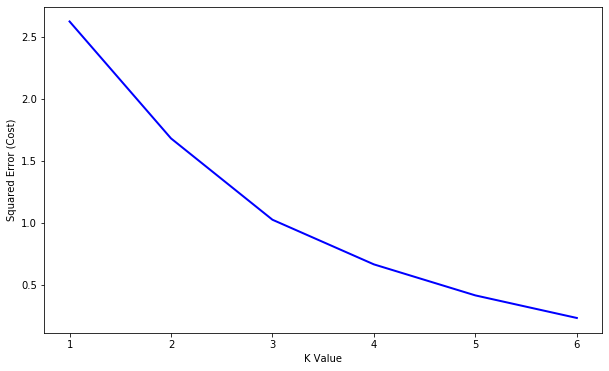

In [26]:
# calculating elbow point for optimum K value

cost =[] 
for i in range(1, 7): 
    kmeans = KMeans(n_clusters = i, max_iter = 1000) 
    kmeans.fit(richmond_grouped_clustering) 
      
    # calculating squared error for the clustered points 
    cost.append(kmeans.inertia_)
    
# plotting cost against K values
plt.figure(figsize=(10,6))
plt.plot(range(1, 7), cost, color ='b', linewidth ='2') 
plt.xlabel("K Value") 
plt.ylabel("Squared Error (Cost)") 
plt.show()

***The optimum value of K is found to be 4. We will now run K-means clustering for K=4.***

In [27]:
# setting number of clusters
kclusters = 4

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(richmond_grouped_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 0, 0, 0, 0, 2, 2, 0, 1], dtype=int32)

In [42]:
# making a new dataframe with cluster labels along with neighborhood data and common venues data

City_Name_venues_sorted.insert(0,'Cluster Label', kmeans.labels_)

richmond_merged = df

# merging City_Name with Richmond to add latitude/longitude for each Neighborhood
richmond_merged = richmond_merged.join(City_Name_venues_sorted.set_index('City_Name'), on='City_Name')
richmond_merged.dropna(inplace=True)
richmond_merged['Clusters'] = richmond_merged['Cluster_Labels'].astype(int)

print(richmond_merged.shape)
richmond_merged.head()

(33, 22)


,Zip_Code,City_Name,Population,Average_Income_Household,Latitude,Longitude,Cluster Label,Cluster_Label,Clusters,Cluster Labels,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,23113,Midlothian,23662,123124,37.759696,-77.481870,0.0,0.0,0,0.0,...,American Restaurant,Sandwich Place,Bookstore,Boutique,Brewery,Coffee Shop,Convenience Store,Farmers Market,Frozen Yogurt Shop,Furniture / Home Store
4,23116,Mechanicsville,27272,104322,37.656153,-77.537783,0.0,0.0,0,0.0,...,American Restaurant,Market,Coffee Shop,Mexican Restaurant,Dessert Shop,Gym / Fitness Center,Greek Restaurant,General Entertainment,Noodle House,Comedy Club
5,23233,Henrico,27873,103019,37.771537,-77.322377,0.0,0.0,0,0.0,...,Hotel,Sandwich Place,American Restaurant,Food Truck,Coffee Shop,Shipping Store,Café,Construction & Landscaping,Convenience Store,Fast Food Restaurant
6,23114,Midlothian,19181,91713,37.557876,-77.313140,0.0,0.0,0,0.0,...,American Restaurant,Sandwich Place,Bookstore,Boutique,Brewery,Coffee Shop,Convenience Store,Farmers Market,Frozen Yogurt Shop,Furniture / Home Store
8,23146,Rockville,3209,82619,37.433450,-77.662860,1.0,1.0,1,1.0,...,Insurance Office,Wine Shop,Food,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store


We will now study the clusters formed by k-means clustering to find our suitable cluster

### Cluster 0:

In [43]:
richmond_merged.loc[richmond_merged['Clusters'] == 0, richmond_merged.columns[[1] + list(range(4, richmond_merged.shape[1]))]]


,City_Name,Latitude,Longitude,Cluster Label,Cluster_Label,Clusters,Cluster Labels,Cluster,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Midlothian,37.759696,-77.481870,0.0,0.0,0,0.0,0.0,0.0,American Restaurant,Sandwich Place,Bookstore,Boutique,Brewery,Coffee Shop,Convenience Store,Farmers Market,Frozen Yogurt Shop,Furniture / Home Store
4,Mechanicsville,37.656153,-77.537783,0.0,0.0,0,0.0,0.0,0.0,American Restaurant,Market,Coffee Shop,Mexican Restaurant,Dessert Shop,Gym / Fitness Center,Greek Restaurant,General Entertainment,Noodle House,Comedy Club
5,Henrico,37.771537,-77.322377,0.0,0.0,0,0.0,0.0,0.0,Hotel,Sandwich Place,American Restaurant,Food Truck,Coffee Shop,Shipping Store,Café,Construction & Landscaping,Convenience Store,Fast Food Restaurant
6,Midlothian,37.557876,-77.313140,0.0,0.0,0,0.0,0.0,0.0,American Restaurant,Sandwich Place,Bookstore,Boutique,Brewery,Coffee Shop,Convenience Store,Farmers Market,Frozen Yogurt Shop,Furniture / Home Store
10,Chester,37.482226,-77.659771,0.0,0.0,0,0.0,0.0,0.0,American Restaurant,Gas Station,Restaurant,Food Truck,Food,Gastropub,Farmers Market,Deli / Bodega,Dessert Shop,Diner
12,Midlothian,37.422080,-77.781370,0.0,0.0,0,0.0,0.0,0.0,American Restaurant,Sandwich Place,Bookstore,Boutique,Brewery,Coffee Shop,Convenience Store,Farmers Market,Frozen Yogurt Shop,Furniture / Home Store
16,Richmond,37.820363,-77.680814,0.0,0.0,0,0.0,0.0,0.0,Convenience Store,Fast Food Restaurant,Chinese Restaurant,Martial Arts Dojo,Hotel,Pharmacy,Gym / Fitness Center,Gas Station,Gym,Athletics & Sports
17,Henrico,37.539769,-77.435520,0.0,0.0,0,0.0,0.0,0.0,Hotel,Sandwich Place,American Restaurant,Food Truck,Coffee Shop,Shipping Store,Café,Construction & Landscaping,Convenience Store,Fast Food Restaurant
18,Mechanicsville,37.549349,-77.460600,0.0,0.0,0,0.0,0.0,0.0,American Restaurant,Market,Coffee Shop,Mexican Restaurant,Dessert Shop,Gym / Fitness Center,Greek Restaurant,General Entertainment,Noodle House,Comedy Club
19,Hanover,37.553306,-77.493558,0.0,0.0,0,0.0,0.0,0.0,American Restaurant,Jewelry Store,Coffee Shop,Bowling Alley,General College & University,Fast Food Restaurant,Dessert Shop,Diner,Disc Golf,Discount Store


### Cluster 1:

In [44]:
richmond_merged.loc[richmond_merged['Clusters'] == 1, richmond_merged.columns[[1] + list(range(4, richmond_merged.shape[1]))]]



,City_Name,Latitude,Longitude,Cluster Label,Cluster_Label,Clusters,Cluster Labels,Cluster,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Rockville,37.43345,-77.66286,1.0,1.0,1,1.0,1.0,1.0,Insurance Office,Wine Shop,Food,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store


### Cluster 2:

In [45]:
richmond_merged.loc[richmond_merged['Clusters'] == 2, richmond_merged.columns[[1] + list(range(4, richmond_merged.shape[1]))]]


,City_Name,Latitude,Longitude,Cluster Label,Cluster_Label,Clusters,Cluster Labels,Cluster,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Montpelier,37.545988,-77.936728,2.0,2.0,2,2.0,2.0,2.0,Baseball Field,Soccer Field,Wine Shop,Food,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar
14,Powhatan,37.731490,-77.704529,2.0,2.0,2,2.0,2.0,2.0,Auto Workshop,Baseball Field,Wine Shop,Food & Drink Shop,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store


### Cluster 3

In [46]:
richmond_merged.loc[richmond_merged['Clusters'] == 3, richmond_merged.columns[[1] + list(range(4, richmond_merged.shape[1]))]]


,City_Name,Latitude,Longitude,Cluster Label,Cluster_Label,Clusters,Cluster Labels,Cluster,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Ashland,37.579912,-77.523347,3.0,3.0,3,3.0,3.0,3.0,American Restaurant,Playground,Cuban Restaurant,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Electronics Store


### Cluster 4

In [47]:
richmond_merged.loc[richmond_merged['Clusters'] == 4, richmond_merged.columns[[1] + list(range(4, richmond_merged.shape[1]))]]


,City_Name,Latitude,Longitude,Cluster Label,Cluster_Label,Clusters,Cluster Labels,Cluster,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


***We can see that Cluster 0 has mostly restaurants as most common venue which is what we are interested in. We will select Cluster 0 as our final cluster:***

***We select cluster 2 neighborhoods data into a pandas dataframe.***


In [51]:

richmond_select = richmond_merged[richmond_merged['Clusters'] == 0]

print(richmond_select.shape)
richmond_select

df_new = richmond_select.groupby(richmond_select['City_Name']).aggregate({'Population': 'sum',})


(29, 22)


In [60]:
# creating map of Richmond using latitude and longitude values
richmond_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding selected markers to map
for lat, lng, label in zip(richmond_select['Latitude'], richmond_select['Longitude'], richmond_select['Zip_Code']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        label= 'Zip_Code',
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(richmond_map)  
    
richmond_map

The above map shows the zip codes in cluster O i.e, our selected Zip Codes.

We have narrowed our list of neighborhoods to 20.

In [54]:
# getting the mean venues data of each selected neighborhood from manhattan_grouped

richmond_grouped_select = pd.DataFrame()
richmond_grouped_select['City_Name'] = richmond_select['City_Name']

richmond_grouped_select = richmond_grouped_select.join(richmond_grouped.set_index('City_Name'), on='City_Name')
richmond_grouped_select.dropna(inplace=True)
richmond_grouped_select.sort_values('American Restaurant',ascending=False,inplace=True)
richmond_grouped_select.reset_index(drop=True,inplace=True)

print(richmond_grouped_select.shape)



(29, 113)


We will plot the mean value of American Restaurants for each selected neighborhood to study the presence of competition in each neighborhood.

***Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category***


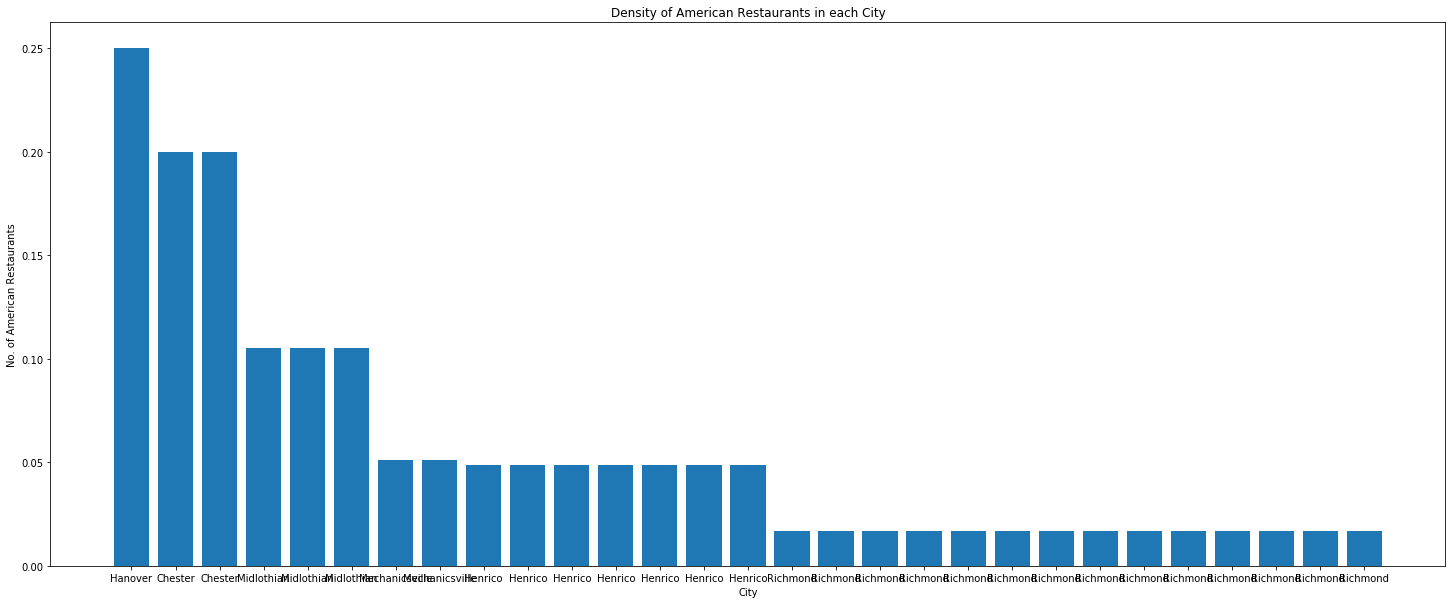

In [55]:
label = list(richmond_grouped_select['City_Name'])
    
height = list(richmond_grouped_select['American Restaurant'])

index = np.arange(len(label))

plt.figure(figsize=(25,10))
plt.bar(index,height)
plt.xlabel('City')
plt.ylabel('No. of American Restaurants')
plt.xticks(index,label)
plt.title('Density of American Restaurants in each City')
plt.show()

The above graph shows that the first two Zip Codes has almost double competition than the rest. If we go only by competion, we should select the last neighborhood but a little qualitative study revealed that it is less safe and less culturally diverse. The rest of the Zip Codes has the same level of competition. So, we can select any of these three neighborhoods depending on other qualitative factors.

---
---

## Conclusion: 

***Hanover and Chester are the top two wealthiest locations with the most competion for American Restaurants.***